In [58]:
import ROOT as r
from ROOT import gStyle
import numpy as np

def biner(o_bin,m_bin,f_bin,f_step,l_step):
    a=np.arange(o_bin,m_bin,f_step)
    b=np.arange(m_bin,f_bin+l_step,l_step)
    return np.concatenate((a,b))

def normalization(hist_list):
    for hist in hist_list:
        for i in range(0,len(rebining)):
            value=hist.GetBinContent(i)
            error=hist.GetBinError(i)
            sf=hist.GetBinWidth(i)/5.0    
            hist.SetBinContent(i,value/sf)
            hist.SetBinError(i,error/sf)    

3188.9501953125
82.35925837291245


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file MUON_MS_VAR.pdf has been created


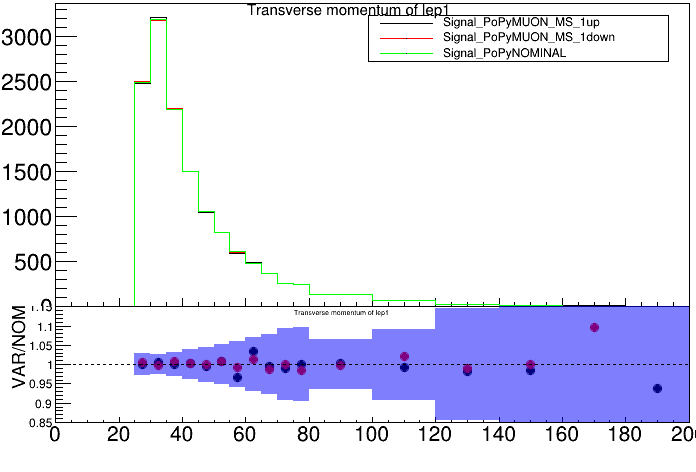

In [117]:
samples=["Signal_PoPyMUON_MS_1up.root","Signal_PoPyMUON_MS_1down.root","Signal_PoPyNOMINAL.root"]

canvas = r.TCanvas("canvas")
canvas.cd()



gStyle.SetOptStat(0)

##### DRAWING TOP PAD, SETTING MARGINS #######

pad1 = r.TPad (" pad1 "," pad1 " ,0 ,0.35 ,1 ,1)
pad1.SetTopMargin(0.01)
pad1.SetRightMargin(0.01)
pad1.SetLeftMargin(0.08)
pad1.SetBottomMargin(0.0)
pad1.Draw ()
pad1.cd ()

rebining=biner(0.0,80.0,200.0,5.0,20.0)
legend = r.TLegend (0.53 ,0.80 ,0.96 ,0.95)
    
a=1
for s in samples:
    file=r.TFile.Open(s,"READ")
    h=file.Get("lep_pt0_topo_dphi_btag_iso_rnn_ptmu_omega_mreco_tpt")
    h.SetDirectory(0)
    file.Close()
    #print(binning)
    h=h.Rebin(len(rebining)-1,"hola",rebining)
    normalization([h])
    h.SetLineColor(a)
    legend.AddEntry ( h ,s[:-5])
    h.Draw("HIST same")
    h.GetYaxis().SetLabelSize(0.08)
    
    a=a+1

legend.Draw()
    
    
canvas.cd()
pad2 = r.TPad (" pad2 "," pad2 " ,0 ,0.00 ,1 ,0.35)
pad2.SetRightMargin(0.01)
pad2.SetLeftMargin(0.08)
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.3)
pad2.Draw ()
pad2.cd ()

NOM=r.TFile.Open("Signal_PoPyNOMINAL.root","READ")
nom=NOM.Get("lep_pt0_topo_dphi_btag_iso_rnn_ptmu_omega_mreco_tpt")
nom.SetDirectory(0)
UP=r.TFile.Open("Signal_PoPyMUON_MS_1up.root","READ")
up=UP.Get("lep_pt0_topo_dphi_btag_iso_rnn_ptmu_omega_mreco_tpt")
up.SetDirectory(0)
DOWN=r.TFile.Open("Signal_PoPyMUON_MS_1down.root","READ")
down=DOWN.Get("lep_pt0_topo_dphi_btag_iso_rnn_ptmu_omega_mreco_tpt")
down.SetDirectory(0)

nom=nom.Rebin(len(rebining)-1,"nom",rebining)
up=up.Rebin(len(rebining)-1,"up",rebining)
down=down.Rebin(len(rebining)-1,"down",rebining)
normalization([nom,up,down])

print(nom.GetBinContent(7))
print(nom.GetBinError(7))

ratio_up=up.Clone()
ratio_up.Divide(nom)
ratio_up.SetLineColor(1)

ratio_uncern=nom.Clone()
ratio_uncern.Divide(nom)
ratio_uncern.Rebin(len(rebining)-1,"ru",rebining)
ratio_uncern.SetFillColorAlpha(r.kBlue,0.5)

for j in range(1,ratio_uncern.GetNbinsX()+2):
        ratio_uncern.SetBinError(j,ratio_uncern.GetBinError(j)/(2**0.5))

ratio_down=down.Clone()
ratio_down.Divide(nom)
ratio_down.SetLineColor(2)

ratio_up.GetYaxis().SetRangeUser (0.85 ,1.15)
ratio_up.Draw("HIST p same")
ratio_down.Draw("HIST p same")
ratio_uncern.Draw("E2 same")


ratio_up.GetXaxis().SetLabelSize(0.14)
ratio_up.GetYaxis().SetLabelSize(0.08)
ratio_up.GetYaxis().SetTitle ("VAR/NOM")
ratio_up.GetYaxis().SetTitleSize(0.12)
ratio_up.GetYaxis().SetTitleOffset(0.28)

ratio_up.SetMarkerStyle(8)
ratio_up.SetMarkerColor(1)
ratio_down.SetMarkerStyle(8)
ratio_down.SetMarkerColor(2)

line = r.TLine (0,1 ,200,1)
line.SetLineColor (r.kBlack )
line.SetLineWidth (1)
line.SetLineStyle(2)

line.Draw("same")

canvas.Draw()
canvas.Print("MUON_MS_VAR.pdf")